In [2]:
import pandas as pd

# Caminho do arquivo
file_path = "df_resultado.xlsx"

# Carregar o arquivo para verificar suas abas
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Sheet1']

In [3]:
# Carregar os dados da aba identificada
df = pd.read_excel(xls, sheet_name='Sheet1')

# Exibir as primeiras linhas para verificar a estrutura
df.head()


,DATA,PERSON ID,NOME DO CLIENTE,PERGUNTA,CLASSIFICAÇÃO,id,data_atendimento,task_sid,person_id,conversationsid,...,status_esteira_contrato,margin_code,pergunta,resposta_gpt,context_vectordb,fila_twilio,intention,historico_interacoes,usage_tokens,distances_list
0,2025-01-02,7282938,Silvio,Sai hoje ?,Bom,354281,2025-01-02,no value,7282938,CH05fe1b022506491bbb94503e33afb43b,...,FGTS_NEW_PENDING_AUTORIZATION,OK,Sai hoje ?,"Olá, Silvio! 😊\n\nPara que sua antecipação sej...","{'question': ['recebo hoje?', 'FGTS_NEW_PENDIN...",INTERNAL_GPT_FGTS_POS,Pós-Contratação,[{'duvida_cliente': 'Queria saber se meu contr...,1713,0.860260
1,2025-01-02,11948661,Alison,Quero quitas saque aniversário como faço\n,Bom,354534,2025-01-02,no value,11948661,CH018b7b9590054233a9e73117955adcf9,...,FGTS_NEW_PAID,7,Quero quitas saque aniversário como faço,Olá Alison! 😊\n\nVi que você solicitou uma ant...,{'question': ['Tem como quitar a antecipação d...,INTERNAL_GPT_FGTS_POS,Pós-Contratação,[],1225,0.942782
2,2025-01-02,11221966,Driane,O pagamento foi realizado porém o dinheiro não...,Bom,354499,2025-01-02,no value,11221966,CH380e36b8b3f149e4b06655914fe893a0,...,FGTS_NEW_PAID,OK,O pagamento foi realizado porém o dinheiro não...,"Olá, Driane! 😊\n\nVi que você solicitou uma an...",{'question': ['O pagamento é realizado ainda h...,INTERNAL_GPT_FGTS_POS,Pós-Contratação,[],1070,0.938025
3,2025-01-02,9192252,Cecilia,O banco que eu botei pra fazer o depósito do s...,Bom,354584,2025-01-02,no value,9192252,CH8ab3ef72be874150a738d0cb3c551d74,...,FGTS_NEW_PENDING_AUTORIZATION,OK,O banco que eu botei pra fazer o depósito do s...,Olá Cecilia! 😊\n\nPara que possamos concluir a...,{'question': ['Pq está demorando para deposita...,INTERNAL_GPT_FGTS_POS,Pós-Contratação,[],1173,0.893144
4,2025-01-02,12905832,Suelen,Oiê eu fiz o contrato...mas vi que tava em ave...,Bom,354600,2025-01-02,no value,12905832,CHddf04d01521445c4b59b039c3dced1b0,...,FGTS_NEW_PENDING_AUTORIZATION,OK,Oiê eu fiz o contrato...mas vi que tava em ave...,"Oi Suelen! 😊\n\nPelo que você mencionou, parec...",{'question': ['Está com a instituição não auto...,INTERNAL_GPT_FGTS_POS,Pós-Contratação,[],1240,0.906661


In [5]:
# Converter a coluna DATA para datetime, caso ainda não esteja
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# Filtrar os dados de janeiro de 2025
df_jan_2025 = df[(df['DATA'].dt.year == 2025) & (df['DATA'].dt.month == 1)]

# Selecionar apenas as colunas desejadas
df_filtered = df_jan_2025[['status_esteira_contrato', 'intention']]

# Filtrar apenas os dados onde 'intention' é 'Pós-Contratação'
df_final = df_filtered[df_filtered['intention'] == 'Pós-Contratação']

# Filtrar apenas os dados onde 'status_esteira_contrato' é 'FGTS_NEW_PAID'
df_final_filtered = df_final[df_final['status_esteira_contrato'] == 'FGTS_NEW_PAID']

# Exibir os primeiros resultados para validação
df_final_filtered.head()



,status_esteira_contrato,intention
1,FGTS_NEW_PAID,Pós-Contratação
2,FGTS_NEW_PAID,Pós-Contratação
5,FGTS_NEW_PAID,Pós-Contratação
8,FGTS_NEW_PAID,Pós-Contratação
10,FGTS_NEW_PAID,Pós-Contratação


In [6]:
# Verificar a distribuição das classificações na base de dados
df_classificacao = df_jan_2025[['CLASSIFICAÇÃO', 'distances_list']].copy()

# Converter a coluna distances_list para numérico para análise
df_classificacao['distances_list'] = pd.to_numeric(df_classificacao['distances_list'], errors='coerce')

# Analisar estatísticas descritivas da distância por classificação
df_analysis = df_classificacao.groupby('CLASSIFICAÇÃO')['distances_list'].describe()

# Exibir os dados para visualização
df_analysis


,count,mean,std,min,25%,50%,75%,max
CLASSIFICAÇÃO,,,,,,,,
Bom,2070.0,0.949439,0.044439,0.613049,0.927913,0.955043,0.983398,1.000130
Muito ruim,262.0,0.923720,0.044963,0.724111,0.905089,0.930095,0.952256,1.000115
Médio,61.0,0.940113,0.046587,0.792337,0.919880,0.941838,0.976847,1.000122
Ruim,147.0,0.907830,0.065055,0.613049,0.886567,0.918906,0.947760,1.000122
sem interação,4.0,0.898415,0.084551,0.812431,0.839230,0.890583,0.949768,1.000061


In [7]:
# Selecionar as colunas relevantes para análise
df_text_analysis = df_jan_2025[['CLASSIFICAÇÃO', 'pergunta', 'resposta_gpt']].copy()

# Verificar padrões nas perguntas e respostas para cada classificação
df_text_analysis_grouped = df_text_analysis.groupby('CLASSIFICAÇÃO').agg({
    'pergunta': lambda x: ' | '.join(x[:10]),  # Concatenar algumas perguntas para referência
    'resposta_gpt': lambda x: ' | '.join(x[:10])  # Concatenar algumas respostas para referência
}).reset_index()

# Exibir os dados para análise
df_text_analysis_grouped


,CLASSIFICAÇÃO,pergunta,resposta_gpt
0,Bom,Sai hoje ? | Quero quitas saque aniversário co...,"Olá, Silvio! 😊\n\nPara que sua antecipação sej..."
1,Muito ruim,Fiz um saque aniversário com vcs e o valor não...,"Olá, Roberta! 😊\n\nVi que você solicitou uma a..."
2,Médio,Tá dizendo que está bloqueado | 668420 70 | Nã...,Quando você decide fazer a antecipação do saqu...
3,Ruim,No consigo castrar el banco | Vcs q tem que me...,"Entendi, Gabriel. 😊\n\nA meutudo veio para mud..."
4,sem interação,sim | Oi | 397752 | Oque eu devo fazer para da...,"Boa tarde, Derlane! 😊\n\nTudo certo por aqui! ..."


Aqui estão algumas observações iniciais sobre padrões nas perguntas e respostas de acordo com a classificação:

"Bom"

Perguntas: Geralmente são diretas e objetivas, como "Sai hoje?", "Quero quitar saque aniversário, como faço?".
Respostas: São bem estruturadas, com saudações e explicações claras sobre os próximos passos. Há presença de emojis e linguagem amigável, o que pode contribuir para a boa avaliação.
"Muito Ruim"

Perguntas: Relacionadas a problemas graves, como "Fiz um saque aniversário com vcs e o valor não caiu", ou reclamações de erro no processo.
Respostas: Muitas vezes o GPT repete informações ou não resolve a dúvida do cliente, o que pode gerar frustração. Exemplo: "Vi que você solicitou uma antecipação de saque aniversário e identifiquei que o valor já se encontra na sua conta", quando o cliente diz que não recebeu o dinheiro.
"Médio"

Perguntas: Podem indicar dúvidas um pouco mais complexas, como "Tá dizendo que está bloqueado" ou "Não consigo cadastrar o banco".
Respostas: São corretas, mas podem ser genéricas ou não trazer a melhor orientação possível. Exemplo: respostas que explicam um conceito, mas não solucionam o problema diretamente.
"Ruim"

Perguntas: Muitas vezes demonstram frustração ou dúvidas mal interpretadas, como "Vcs que tem que me devolver" ou "Não consigo cadastrar o banco".
Respostas: Podem ser confusas ou pouco claras. Há exemplos onde a resposta parece não se conectar bem com a pergunta, sugerindo que o modelo pode ter dificuldades em entender certos contextos.
"Sem Interação"

Perguntas: Podem ser testes, mensagens genéricas como "Oi", "397752", "sim", ou frases sem muito contexto.
Respostas: Muitas vezes são neutras ou apenas retornam uma saudação, sem muito conteúdo adicional.
Padrões Identificados
Respostas bem avaliadas (Bom) tendem a ser diretas, amigáveis e trazer explicações completas.
Respostas mal avaliadas (Ruim/Muito Ruim) geralmente apresentam:
Repetição excessiva de informações.
Falta de personalização na resposta.
Erro de interpretação do problema do cliente.
Instruções que não resolvem a dúvida (exemplo: dizer que o dinheiro já caiu quando o cliente afirma que não caiu).

ValueError: not enough values to unpack (expected 2, got 0)

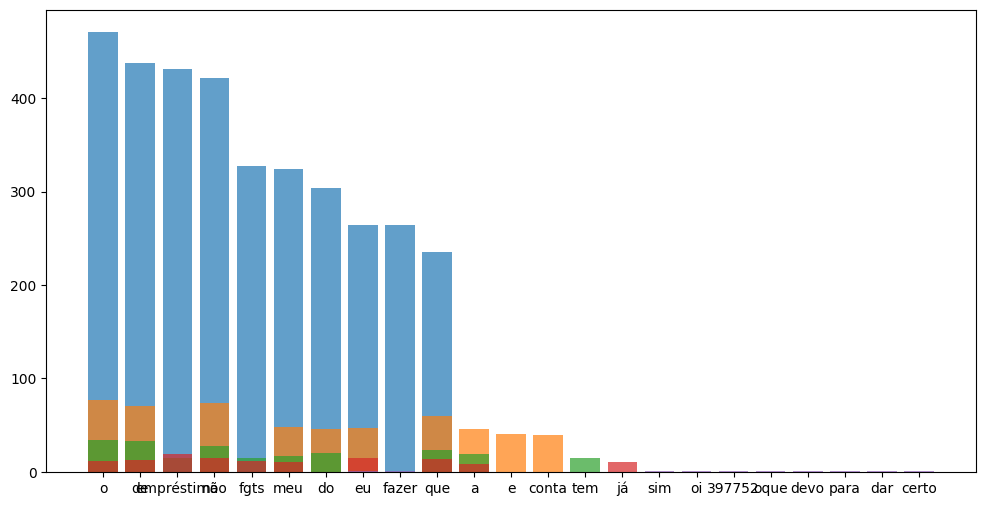

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

# Função para processar texto e contar palavras mais frequentes
def process_text(text_series):
    all_words = []
    for text in text_series.dropna():
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenizar palavras removendo pontuações
        all_words.extend(words)
    return Counter(all_words)

# Analisar frequência de palavras nas perguntas por classificação
word_freq_per_class = {}
for classification in df_text_analysis['CLASSIFICAÇÃO'].unique():
    word_freq_per_class[classification] = process_text(df_text_analysis[df_text_analysis['CLASSIFICAÇÃO'] == classification]['pergunta'])

# Selecionar as 10 palavras mais comuns por classificação
top_words_per_class = {cls: freq.most_common(10) for cls, freq in word_freq_per_class.items()}

# Criar gráfico de barras para visualização
fig, ax = plt.subplots(figsize=(12, 6))
for classification, word_freq in top_words_per_class.items():
    words, counts = zip(*word_freq)
    ax.bar(words, counts, alpha=0.7, label=classification)

ax.set_title('Frequência de Palavras nas Perguntas por Classificação')
ax.set_ylabel('Frequência')
ax.set_xticklabels(words, rotation=45)
ax.legend()
plt.show()

# Exibir os top 10 termos por classificação
top_words_per_class


/tmp/ipykernel_81410/514716450.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, rotation=45)


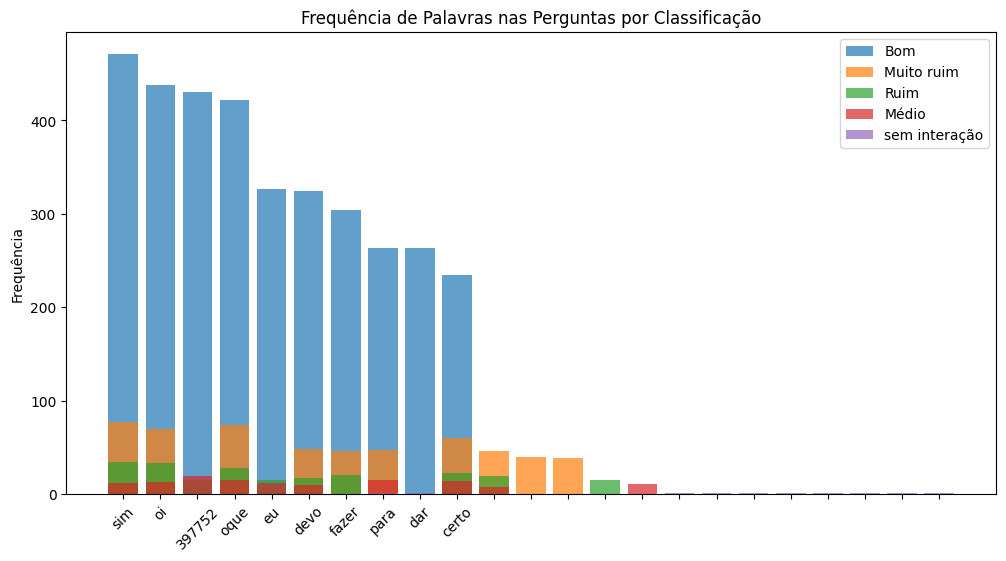

{'Bom': [('o', 471),
  ('de', 438),
  ('empréstimo', 431),
  ('não', 422),
  ('fgts', 327),
  ('meu', 324),
  ('do', 304),
  ('eu', 264),
  ('fazer', 264),
  ('que', 235)],
 'Muito ruim': [('o', 77),
  ('não', 74),
  ('de', 70),
  ('que', 60),
  ('meu', 48),
  ('eu', 47),
  ('a', 46),
  ('do', 46),
  ('e', 40),
  ('conta', 39)],
 'Ruim': [('o', 34),
  ('de', 33),
  ('não', 28),
  ('que', 23),
  ('do', 20),
  ('a', 19),
  ('meu', 17),
  ('tem', 15),
  ('empréstimo', 15),
  ('fgts', 15)],
 'Médio': [('empréstimo', 19),
  ('não', 15),
  ('eu', 15),
  ('que', 14),
  ('de', 13),
  ('o', 12),
  ('fgts', 12),
  ('já', 11),
  ('meu', 10),
  ('a', 8)],
 'sem interação': [('sim', 1),
  ('oi', 1),
  ('397752', 1),
  ('oque', 1),
  ('eu', 1),
  ('devo', 1),
  ('fazer', 1),
  ('para', 1),
  ('dar', 1),
  ('certo', 1)]}

In [9]:
# Verificar se há classificações sem palavras frequentes
empty_classes = [cls for cls, freq in top_words_per_class.items() if not freq]

# Filtrar apenas as classificações com palavras frequentes
filtered_top_words_per_class = {cls: freq for cls, freq in top_words_per_class.items() if freq}

# Criar gráfico de barras apenas para as classificações com dados
fig, ax = plt.subplots(figsize=(12, 6))
for classification, word_freq in filtered_top_words_per_class.items():
    words, counts = zip(*word_freq)
    ax.bar(words, counts, alpha=0.7, label=classification)

ax.set_title('Frequência de Palavras nas Perguntas por Classificação')
ax.set_ylabel('Frequência')
ax.set_xticklabels(words, rotation=45)
ax.legend()
plt.show()

# Exibir os top 10 termos por classificação para as classes com dados
filtered_top_words_per_class
